In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df_users = pd.read_csv('users.csv', sep='\t')
df_submissions = pd.read_csv('submissions.csv', sep='\t')

C:\Users\dti Digital\AppData\Local\Temp\ipykernel_24932\1313957630.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_users = pd.read_csv('users.csv', sep='\t')


In [3]:
df_users = df_users.rename(columns={'rating': 'userRating'})
df_submissions = df_submissions.rename(columns={'rating': 'problemRating'})

In [6]:
df_users = df_users.dropna(subset=['handle', 'userRating'], ignore_index=True)

### Users Analysis

In [7]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681247 entries, 0 to 681246
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   handle                   681247 non-null  object 
 1   email                    22245 non-null   object 
 2   vkId                     1051 non-null    float64
 3   openId                   106 non-null     object 
 4   firstName                146198 non-null  object 
 5   lastName                 135126 non-null  object 
 6   country                  191573 non-null  object 
 7   city                     150195 non-null  object 
 8   organization             149326 non-null  object 
 9   contribution             681247 non-null  int64  
 10  rank                     681247 non-null  object 
 11  userRating               681247 non-null  float64
 12  maxRank                  681247 non-null  object 
 13  maxRating                681247 non-null  float64
 14  last

In [8]:
df_users.head()

,handle,email,vkId,openId,firstName,lastName,country,city,organization,contribution,rank,userRating,maxRank,maxRating,lastOnlineTimeSeconds,registrationTimeSeconds,friendOfCount,avatar,titlePhoto
0,------------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aktobe KTL,0,newbie,1172.0,pupil,1399.0,1601121531,1451119991,1,https://userpic.codeforces.org/no-avatar.jpg,https://userpic.codeforces.org/no-title.jpg
1,----------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pupil,1370.0,pupil,1370.0,1583237730,1555168540,1,https://userpic.codeforces.org/no-avatar.jpg,https://userpic.codeforces.org/no-title.jpg
2,-------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,pupil,1322.0,specialist,1423.0,1620821408,1575083367,0,https://userpic.codeforces.org/no-avatar.jpg,https://userpic.codeforces.org/no-title.jpg
3,---------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,newbie,783.0,pupil,1367.0,1600105080,1527792619,1,https://userpic.codeforces.org/no-avatar.jpg,https://userpic.codeforces.org/no-title.jpg
4,----------,NaN,NaN,NaN,Fedor,Ushakov,NaN,NaN,NaN,0,master,2188.0,international master,2320.0,1699555096,1458406661,187,https://userpic.codeforces.org/399686/avatar/5...,https://userpic.codeforces.org/399686/title/17...


In [9]:
df_users = df_users.loc[df_users['userRating'] >= 700.0]

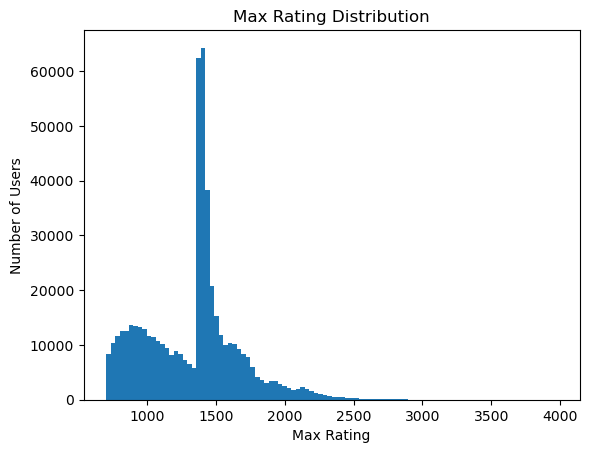

In [10]:
plt.hist(df_users['maxRating'], bins=100)
plt.title('Max Rating Distribution')
plt.xlabel('Max Rating')
plt.ylabel('Number of Users')
plt.show()

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


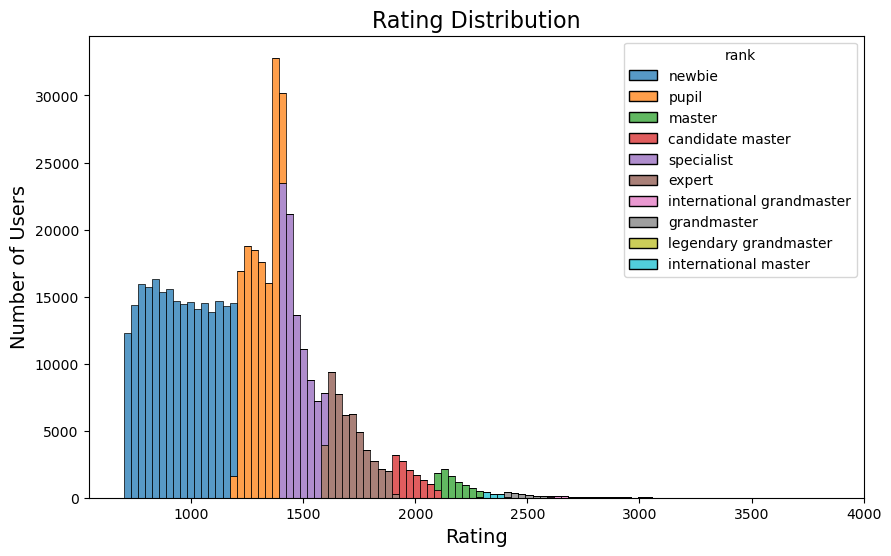

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_users, x='userRating', hue='rank', bins=100, multiple="stack")
plt.title('Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.show()

In [12]:
df_users['registrationTime'] = pd.to_datetime(df_users['registrationTimeSeconds'], unit='s')
df_users['year'] = df_users['registrationTime'].dt.year

# Filtrar os dados desde 2010
df_users = df_users[df_users['year'] >= 2010]

In [13]:
df_users['year'].unique()

array([2015, 2019, 2018, 2016, 2017, 2010, 2022, 2020, 2023, 2012, 2011,
       2021, 2014, 2024, 2013])

In [14]:
# Calcular a soma cumulativa de usuários
df_cumulative_users = df_users.groupby('year')['handle'].count().cumsum().reset_index()
df_cumulative_users.columns = ['year', 'cumulative_users']

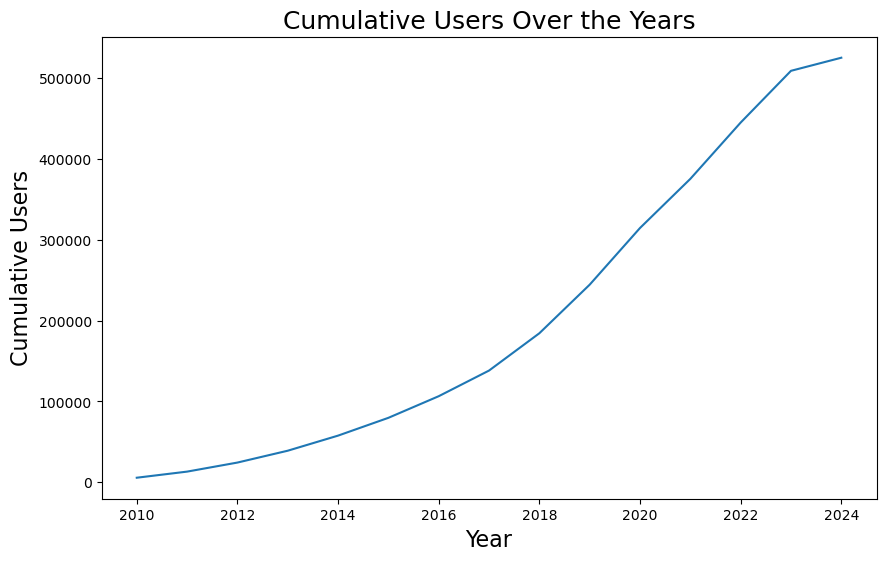

In [15]:
# Plotar os dados
plt.figure(figsize=(10,6))
plt.plot(df_cumulative_users['year'], df_cumulative_users['cumulative_users'])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Cumulative Users', fontsize=16)
plt.title('Cumulative Users Over the Years', fontsize=18)
plt.show()

In [16]:
df_country_counts = df_users.groupby('country')['handle'].count().reset_index()
df_country_counts.loc[df_country_counts['country'] == 'Brazil']

,country,handle
31,Brazil,1979


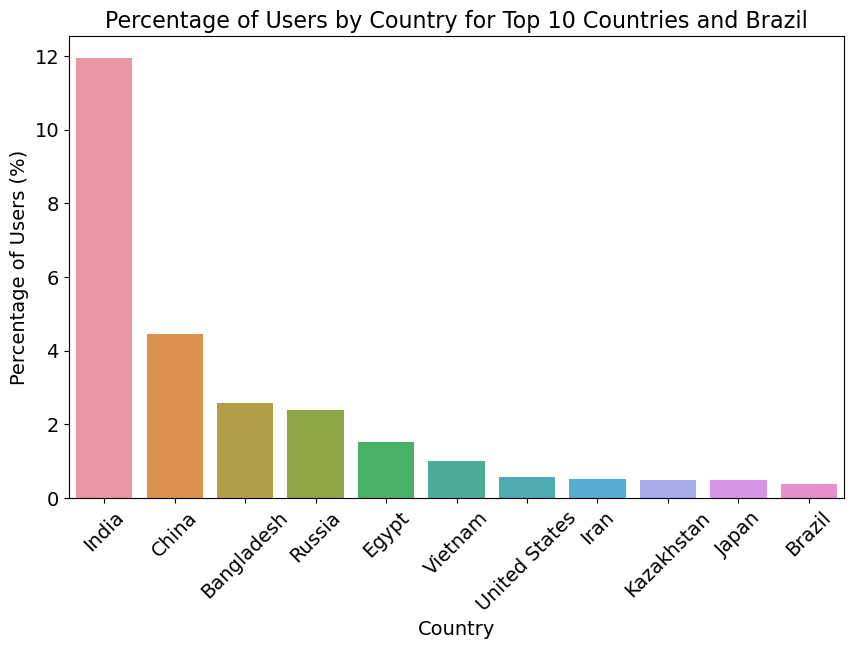

In [17]:
# Calculate the percentage of users in each country
country_percent = (df_users.groupby('country')['handle'].count() / df_users['handle'].count()) * 100

# Select the top 10 countries
selected_countries = country_percent.nlargest(10)

# If Brazil is not in the top 10, add it
if 'Brazil' not in selected_countries.index:
    selected_countries = pd.concat([selected_countries, pd.Series(country_percent.loc['Brazil'], index=['Brazil'])])

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot(x=selected_countries.index, y=selected_countries.values)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Percentage of Users (%)', fontsize=14)
plt.title('Percentage of Users by Country for Top 10 Countries and Brazil', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [18]:
rank_percent = (df_users.groupby('rank')['handle'].count() / df_users['rank'].count()) * 100
rank_percent

rank
candidate master              2.335412
expert                        9.347555
grandmaster                   0.278901
international grandmaster     0.123829
international master          0.203079
legendary grandmaster         0.024956
master                        1.617395
newbie                       44.520858
pupil                        24.550501
specialist                   16.997512
Name: handle, dtype: float64

c:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


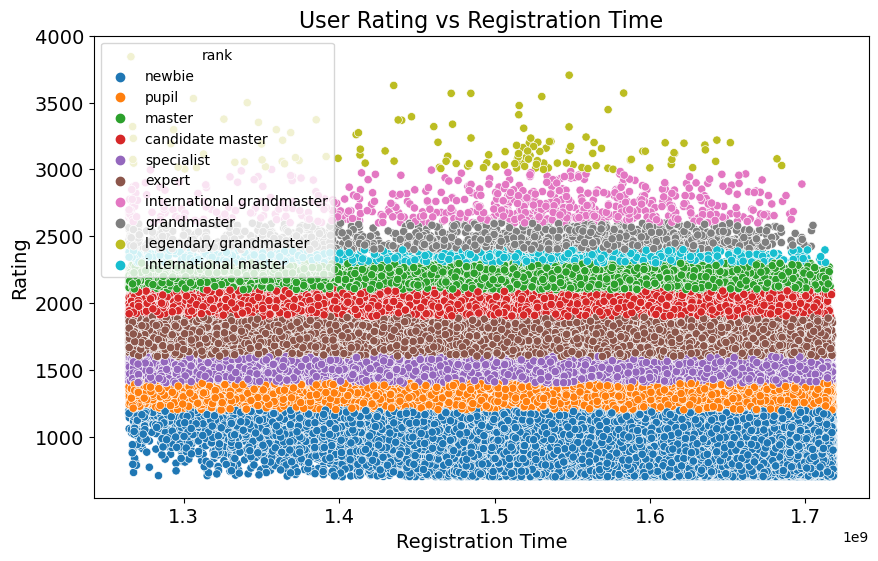

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_users, x='registrationTimeSeconds', y='userRating', hue='rank')
plt.xlabel('Registration Time', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.title('User Rating vs Registration Time', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Submissions Analysis

In [20]:
df_submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7186565 entries, 0 to 7186564
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   handle               object 
 1   contestId            float64
 2   index                object 
 3   points               float64
 4   problemRating        float64
 5   tags                 object 
 6   id                   int64  
 7   programmingLanguage  object 
 8   verdict              object 
dtypes: float64(3), int64(1), object(5)
memory usage: 493.5+ MB


In [21]:
df_submissions.dropna(subset=['problemRating']).head()

,handle,contestId,index,points,problemRating,tags,id,programmingLanguage,verdict
5,---0_0---,1989.0,D,NaN,1900.0,"['brute force', 'data structures', 'dp', 'gree...",267801857,C++20 (GCC 13-64),TIME_LIMIT_EXCEEDED
6,---0_0---,1989.0,D,NaN,1900.0,"['brute force', 'data structures', 'dp', 'gree...",267801070,C++20 (GCC 13-64),TIME_LIMIT_EXCEEDED
7,---0_0---,1989.0,B,NaN,1200.0,"['brute force', 'greedy', 'strings']",267745338,C++20 (GCC 13-64),OK
8,---0_0---,1989.0,C,NaN,1400.0,['greedy'],267734813,C++20 (GCC 13-64),OK
9,---0_0---,1989.0,C,NaN,1400.0,['greedy'],267723621,C++20 (GCC 13-64),WRONG_ANSWER


In [22]:
verdicts = df_submissions['verdict'].value_counts()
verdicts

verdict
OK                         3218783
WRONG_ANSWER               2930342
TIME_LIMIT_EXCEEDED         457352
RUNTIME_ERROR               201396
COMPILATION_ERROR           196114
SKIPPED                      67062
MEMORY_LIMIT_EXCEEDED        57666
PARTIAL                      39087
IDLENESS_LIMIT_EXCEEDED       9944
CHALLENGED                    8603
REJECTED                       158
FAILED                          30
CRASHED                         20
PRESENTATION_ERROR               8
Name: count, dtype: int64

Below we show the proportion between the number of valid submissions and the total number of submissions.

In [23]:
verdicts['OK'] / verdicts.sum()

0.4478889427702943

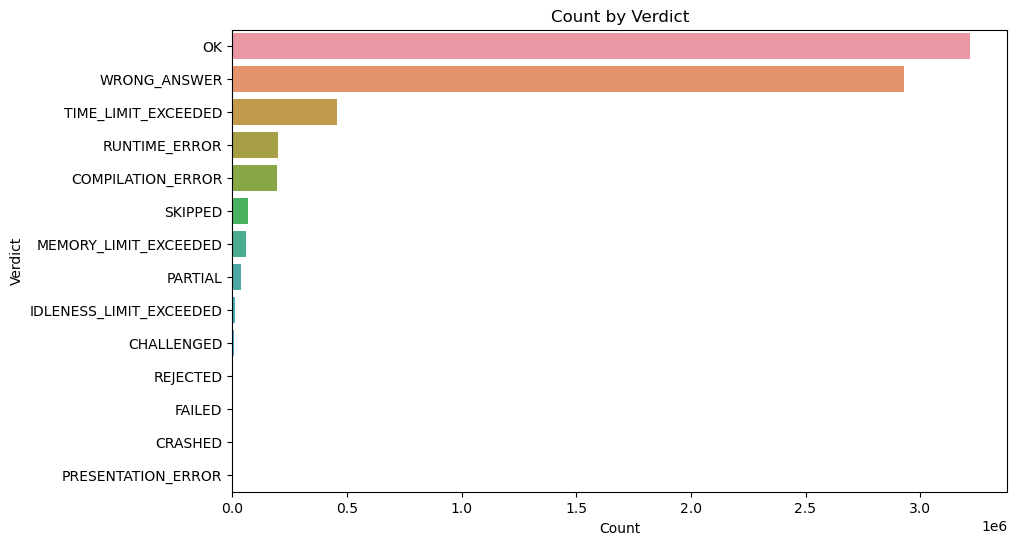

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(y=verdicts.index, x=verdicts.values)
plt.ylabel('Verdict')
plt.xlabel('Count')
plt.title('Count by Verdict')
plt.show()

### User Rating and Submissions Relation

In [25]:
df_users_submissions = df_users.merge(df_submissions, on="handle", how="inner")

In [ ]:
df_users_submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865368 entries, 0 to 6865367
Data columns (total 29 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   handle                   object        
 1   email                    object        
 2   vkId                     float64       
 3   openId                   object        
 4   firstName                object        
 5   lastName                 object        
 6   country                  object        
 7   city                     object        
 8   organization             object        
 9   contribution             int64         
 10  rank                     object        
 11  userRating               float64       
 12  maxRank                  object        
 13  maxRating                float64       
 14  lastOnlineTimeSeconds    int64         
 15  registrationTimeSeconds  int64         
 16  friendOfCount            int64         
 17  avatar                   ob

In [ ]:
df_users_submissions.head()

,handle,email,vkId,openId,firstName,lastName,country,city,organization,contribution,...,registrationTime,year,contestId,index,points,problemRating,tags,id,programmingLanguage,verdict
0,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,2023-03-20 07:43:58,2023,1987.0,D,1500.0,NaN,"['dp', 'games']",268196673,C++20 (GCC 13-64),WRONG_ANSWER
1,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,2023-03-20 07:43:58,2023,1987.0,C,1000.0,NaN,"['dp', 'greedy']",268176116,C++20 (GCC 13-64),OK
2,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,2023-03-20 07:43:58,2023,1987.0,C,1000.0,NaN,"['dp', 'greedy']",268168823,C++20 (GCC 13-64),WRONG_ANSWER
3,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,2023-03-20 07:43:58,2023,1987.0,B,750.0,NaN,['greedy'],268154093,C++20 (GCC 13-64),OK
4,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,2023-03-20 07:43:58,2023,1987.0,A,250.0,NaN,"['greedy', 'math']",268137538,C++20 (GCC 13-64),OK


In [ ]:
df_users_submissions['handle'].value_counts()

handle
BlueDiamond       20887
BenjaR            14663
244mhq            12303
Andreasyan        11969
Actium            11846
                  ...  
ATHUL_567             3
ashika_verma_         3
-LiMiT-               3
Dasai_Mounisri        3
codehack134           2
Name: count, Length: 14530, dtype: int64

In [ ]:
df_active_users = df_users.copy()
df_active_users['submissionCount'] = df_users['handle'].map(df_users_submissions['handle'].value_counts())
df_active_users = df_active_users.dropna(subset=['submissionCount'])

In [ ]:
df_active_users[['submissionCount', 'userRating']].corr()

,submissionCount,userRating
submissionCount,1.000000,0.528857
userRating,0.528857,1.000000


In [ ]:
df_grouped = df_users_submissions.groupby(['handle', 'problemRating']).size().reset_index(name='count')
df_pivot = df_grouped.pivot(index='handle', columns='problemRating', values='count').fillna(0)
df_pivot.columns = ['submissions'+str(col) if col != 'handle' and col != 'count' else col for col in df_pivot.columns]
df_active_users = df_active_users.join(df_pivot, on='handle')

In [ ]:
df_active_users

,handle,email,vkId,openId,firstName,lastName,country,city,organization,contribution,...,submissions2600.0,submissions2700.0,submissions2800.0,submissions2900.0,submissions3000.0,submissions3100.0,submissions3200.0,submissions3300.0,submissions3400.0,submissions3500.0
24,---0_0---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,---__---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Faculty of Engineering, Ain Shams University",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,--55,NaN,NaN,NaN,SAI,CHARAN,NaN,NaN,IIT Patna,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,--aarchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,--Adharsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167955,dibragim,NaN,NaN,NaN,Diyorbek,Ibragimov,Uzbekistan,Fergana,Carnegie Mellon University,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167958,Dibs07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167980,dibyanshukar8,NaN,NaN,NaN,Dibyanshu,Kar,India,Silchar,NIT Silchar,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167983,dibyarup,NaN,NaN,NaN,Dibyarup,Deb,India,Kolkata,NaN,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_submissions_rating = df_active_users.loc[:, 'submissionCount':]
df_submissions_rating['userRating'] = df_active_users['userRating']
df_submissions_rating

,submissionCount,submissions800.0,submissions900.0,submissions1000.0,submissions1100.0,submissions1200.0,submissions1300.0,submissions1400.0,submissions1500.0,submissions1600.0,...,submissions2700.0,submissions2800.0,submissions2900.0,submissions3000.0,submissions3100.0,submissions3200.0,submissions3300.0,submissions3400.0,submissions3500.0,userRating
24,217.0,32.0,7.0,10.0,9.0,17.0,14.0,34.0,16.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1485.0
36,322.0,76.0,20.0,11.0,26.0,20.0,26.0,38.0,7.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1437.0
43,255.0,149.0,42.0,39.0,14.0,8.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,931.0
44,84.0,50.0,5.0,8.0,8.0,3.0,8.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,804.0
45,81.0,41.0,9.0,2.0,9.0,8.0,3.0,2.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167955,134.0,38.0,3.0,4.0,3.0,4.0,3.0,4.0,53.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,952.0
167958,34.0,30.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,852.0
167980,47.0,27.0,0.0,7.0,4.0,3.0,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,868.0
167983,1005.0,508.0,23.0,53.0,45.0,54.0,53.0,73.0,27.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1405.0


There is an average correlation - around 0.5 - between a user's rating and the number of submissions on issues in the 1600 to 2000 rating range.

It is also possible to notice a strong correlation between the number of submissions on similar rating problems.

<Axes: >

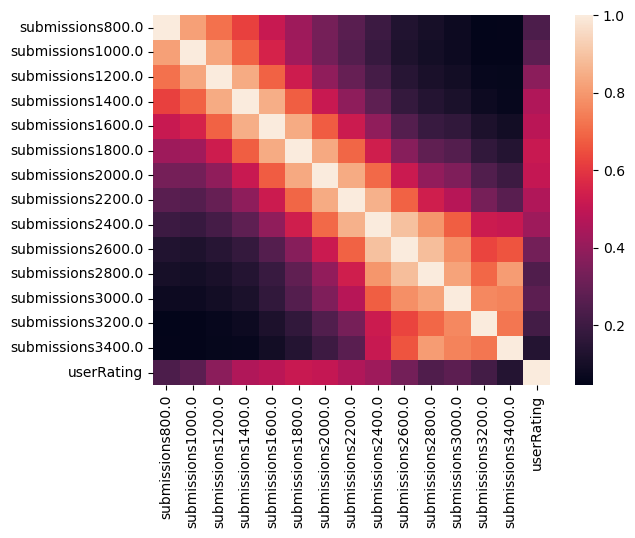

In [ ]:
sns.heatmap(df_submissions_rating.loc[:,'submissions800.0'::2].corr())

It is not possible to see a relevant correlation between the account registration time and the number of submissions.

<Axes: >

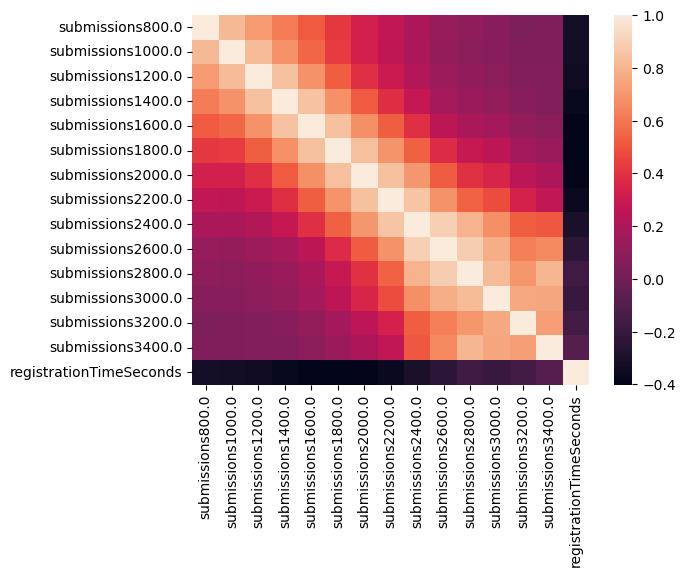

In [ ]:
df_sub_registration = df_active_users.loc[:, 'submissionCount':]
df_sub_registration['registrationTimeSeconds'] = df_active_users['registrationTimeSeconds']
df_sub_registration
sns.heatmap(df_sub_registration.loc[:,'submissions800.0'::2].corr())

### User Rating and Accepted Submissions Relation

In [ ]:
df_users_ok = df_users_submissions[df_users_submissions['verdict'] == 'OK']
df_users_ok = df_users_ok.drop('verdict', axis=1)

In [ ]:
df_active_users['okCount'] = df_users['handle'].map(df_users_ok['handle'].value_counts())

In [ ]:
df_active_users[['okCount', 'userRating']].corr()

,okCount,userRating
okCount,1.000000,0.543273
userRating,0.543273,1.000000


In [ ]:
df_active_users[['submissionCount', 'okCount']].corr()

,submissionCount,okCount
submissionCount,1.000000,0.964413
okCount,0.964413,1.000000


In [ ]:
df_active_users['okRatio'] = df_active_users['okCount'] / df_active_users['submissionCount']

In [ ]:
df_active_users[['okRatio', 'userRating']].corr()

,okRatio,userRating
okRatio,1.00000,0.10649
userRating,0.10649,1.00000


In [ ]:
df_grouped = df_users_ok.groupby(['handle', 'problemRating']).size().reset_index(name='count')
df_pivot = df_grouped.pivot(index='handle', columns='problemRating', values='count').fillna(0)
df_pivot.columns = ['ok'+str(col) if col != 'handle' and col != 'count' else col for col in df_pivot.columns]
df_active_users = df_active_users.join(df_pivot, on='handle')
df_active_users = df_active_users.reset_index(drop=True)

In [ ]:
df_active_users['userRating'] >= 700

0        True
1        True
2        True
3        True
4        True
         ... 
14525    True
14526    True
14527    True
14528    True
14529    True
Name: userRating, Length: 14530, dtype: bool

In [ ]:
df_ok_rating = df_active_users.loc[:, 'okCount':]
df_ok_rating['userRating'] = df_active_users['userRating']
df_ok_rating = df_ok_rating.fillna(0)

The correlation between the number of accepted submissions and user rating is not significantly higher than the correlation between the number of submissions and user rating. This is possibly due to the fact that the two attributes are extremely correlated.

<Axes: >

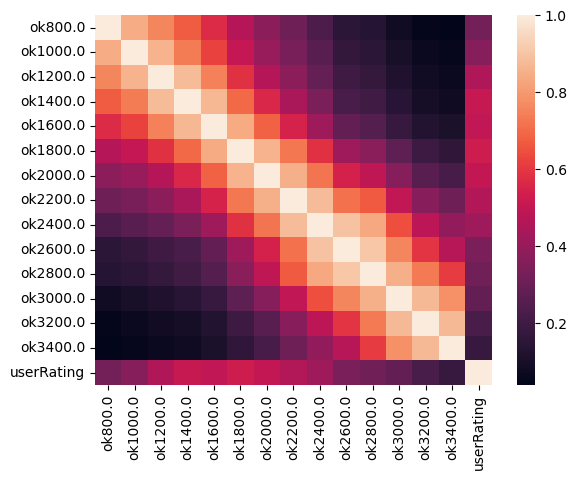

In [ ]:
sns.heatmap(df_ok_rating.loc[:,'ok800.0'::2].corr())

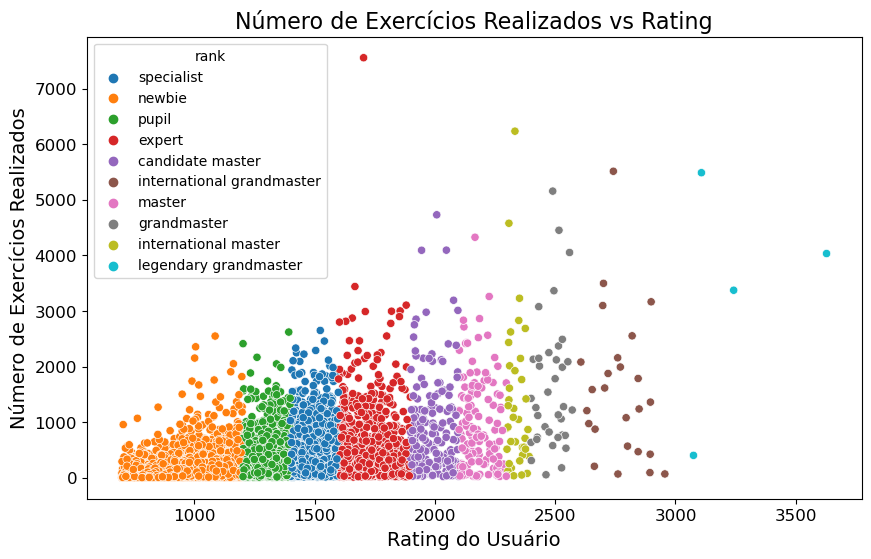

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_active_users, x='userRating', y='okCount', hue='rank')
plt.title('Número de Exercícios Realizados vs Rating', fontsize=16)
plt.xlabel('Rating do Usuário', fontsize=14)
plt.ylabel('Número de Exercícios Realizados', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
df_boolean_ok_count = pd.DataFrame()
rated_users = df_active_users.loc[df_active_users['userRating'] >= 700.0, 'userRating']
df_boolean_ok_count['userRating'] = rated_users

n = [1, 10, 50, 100, 200, 500, 750, 1000]
n = [1, 5, 10, 20, 50, 100]
# n = [i for i in range(1, 100, 2)]

new_cols = []
for col in df_active_users.loc[:, 'ok800.0':'ok3400.0']:
    temp_df = pd.DataFrame()
    for i in range(len(n)):
        if i == len(n) - 1:
            temp_df[f'{col}{n[i]}'] = df_active_users.loc[:, col] >= n[i]
        else:
            temp_df[f'{col}{n[i]}'] = (df_active_users.loc[:, col] >= n[i]) & (df_active_users.loc[:, col] < n[i + 1])
    new_cols.append(temp_df)

df_boolean_ok_count = pd.concat([df_boolean_ok_count] + new_cols, axis=1)
df_boolean_ok_count = df_boolean_ok_count.replace({True: 1, False: 0})
df_boolean_ok_count = df_boolean_ok_count.dropna()
df_boolean_ok_count.head()

,userRating,ok800.01,ok800.05,ok800.010,ok800.020,ok800.050,ok800.0100,ok900.01,ok900.05,ok900.010,...,ok3300.010,ok3300.020,ok3300.050,ok3300.0100,ok3400.01,ok3400.05,ok3400.010,ok3400.020,ok3400.050,ok3400.0100
0,1485.0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1437.0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,931.0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,804.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1199.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_boolean_ok_count = pd.DataFrame()
rated_users = df_active_users.loc[df_active_users['userRating'] >= 700.0, 'userRating']
df_boolean_ok_count['userRating'] = rated_users

n = [1, 10, 50, 100, 200, 500, 750, 1000]
n = [1, 5, 10, 20, 50, 100]
# n = [i for i in range(1, 100, 2)]

new_cols = []
for col in df_active_users.loc[:, 'ok800.0':'ok3400.0']:
    temp_df = pd.DataFrame()
    for i in range(len(n)):
        if i == len(n) - 1:
            temp_df[f'{col}{n[i]}'] = df_active_users.loc[:, col] >= n[i]
        else:
            temp_df[f'{col}{n[i]}'] = (df_active_users.loc[:, col] >= n[i]) #& (df_active_users.loc[:, col] < n[i + 1])
    new_cols.append(temp_df)

df_boolean_ok_count = pd.concat([df_boolean_ok_count] + new_cols, axis=1)
df_boolean_ok_count = df_boolean_ok_count.replace({True: 1, False: 0})
df_boolean_ok_count = df_boolean_ok_count.dropna()
df_boolean_ok_count.head()

,userRating,ok800.01,ok800.05,ok800.010,ok800.020,ok800.050,ok800.0100,ok900.01,ok900.05,ok900.010,...,ok3300.010,ok3300.020,ok3300.050,ok3300.0100,ok3400.01,ok3400.05,ok3400.010,ok3400.020,ok3400.050,ok3400.0100
0,1485.0,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1437.0,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,931.0,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,804.0,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1199.0,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def measure_model(y_test, predictions):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

    r2_score = metrics.r2_score(y_test, predictions)
    print('R2 Score:', r2_score)

# Reshape your data either using array.reshape(-1, 1) if your data has a single feature/column and array.reshape(1, -1) if it contains a single sample.
X = df_boolean_ok_count.loc[:, df_boolean_ok_count.columns != 'userRating']
y = df_boolean_ok_count['userRating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

measure_model(y_test, y_pred)

Mean Absolute Error: 132.76152867286302
Mean Squared Error: 32843.18116321091
Root Mean Squared Error: 181.22687759604233
R2 Score: 0.7065088359006648
